In [1]:
# Colab Path 설정
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks/package_collection', my_path)
sys.path.insert(0, my_path)

Mounted at /content/drive/


In [ ]:
!pip install --target=$my_path pm4py

## Importing CSV Files


In [2]:
  import pandas as pd
  import pm4py
  import numpy as np

In [3]:
df_example_log = pd.read_csv('/content/drive/MyDrive/Colab/Data Analytics/example log.csv',sep = ';')

In [4]:
df_example_log.head(10)

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara
5,3,examine thoroughly,2011-01-06 13:06:00+01:00,400,Sean
6,3,check ticket,2011-01-08 11:43:00+01:00,100,Pete
7,3,decide,2011-01-09 09:55:00+01:00,200,Sara
8,3,pay compensation,2011-01-15 10:45:00+01:00,200,Ellen
9,2,register request,2010-12-30 11:32:00+01:00,50,Mike


In [5]:
event_log_pm4py = pm4py.format_dataframe(df_example_log, case_id='case_id', activity_key='activity',
                                         timestamp_key='timestamp', timest_format='%Y-%m-%d %H:%M:%S%z')

In [6]:
event_log_pm4py.head(10)

,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
15,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,15
16,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16
17,1,decide,2011-01-06 10:18:00+00:00,200,Sara,17
18,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,18
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13


In [7]:
# num of events, num of cases, start and end activities, average of case durations
def basic_data_analysis(event_log):
    num_events = len(event_log)
    num_cases = len(event_log['case:concept:name'].unique())
    start_activities = pm4py.get_start_activities(event_log)
    end_activities = pm4py.get_end_activities(event_log)
    mean_case_durations = np.round(np.mean(pm4py.stats.get_all_case_durations(event_log))/24/60/60, 2)
    print("Number of events: {}\nNumber of cases: {}\nStart activities: {}\nEnd activities: {}\nMean of case durations: {}".format(num_events, num_cases, start_activities, end_activities, mean_case_durations))

In [8]:
basic_data_analysis(event_log_pm4py)

Number of events: 42
Number of cases: 6
Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}
Mean of case durations: 11.19


## Filtering Event Data

In [10]:
filtered_event_log = pm4py.filter_start_activities(event_log_pm4py, {'register request'})
filtered_event_log = pm4py.filter_end_activities(event_log_pm4py, {'pay compensation'})
basic_data_analysis(filtered_event_log)

Number of events: 19
Number of cases: 3
Start activities: {'register request': 3}
End activities: {'pay compensation': 3}
Mean of case durations: 11.58


In [13]:
filtered_event_log = pm4py.filter_event_attribute_values(event_log_pm4py, 'resource', {'Pete', 'Mike'})
basic_data_analysis(filtered_event_log)
filtered_event_log.head(10)

Number of events: 42
Number of cases: 6
Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}
Mean of case durations: 11.19


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
15,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,15
16,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16
17,1,decide,2011-01-06 10:18:00+00:00,200,Sara,17
18,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,18
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13


In [14]:
filtered_event_log = pm4py.filter_event_attribute_values(event_log_pm4py, 'resource', {'Pete', 'Mike'}, level='event')
basic_data_analysis(filtered_event_log)
filtered_event_log.head(10)

Number of events: 18
Number of cases: 6
Start activities: {'register request': 5, 'examine casually': 1}
End activities: {'check ticket': 3, 'reject request': 2, 'pay compensation': 1}
Mean of case durations: 7.5


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
16,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16
18,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,18
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
0,3,register request,2010-12-30 13:32:00+00:00,50,Pete,0
1,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,1
6,3,check ticket,2011-01-08 10:43:00+00:00,100,Pete,6
37,4,register request,2011-01-06 14:02:00+00:00,50,Pete,37
38,4,check ticket,2011-01-07 11:06:00+00:00,100,Mike,38


In [15]:
filtered_event_log = pm4py.filter_trace_attribute_values(event_log_pm4py, 'case:concept:name', {'3', '4'})
basic_data_analysis(filtered_event_log)

Number of events: 14
Number of cases: 2
Start activities: {'register request': 2}
End activities: {'pay compensation': 1, 'reject request': 1}
Mean of case durations: 10.94


In [16]:
filtered_event_log = pm4py.filter_trace_attribute_values(event_log_pm4py, 'case:concept:name', {'3', '4'}, retain=False)
basic_data_analysis(filtered_event_log)

Number of events: 28
Number of cases: 4
Start activities: {'register request': 4}
End activities: {'reject request': 2, 'pay compensation': 2}
Mean of case durations: 11.32


In [17]:
variants = pm4py.get_variants(event_log_pm4py)
for k, v in variants.items():
    print(k)
    print(v)

register request,examine thoroughly,check ticket,decide,reject request
1
register request,check ticket,examine casually,decide,pay compensation
1
register request,examine casually,check ticket,decide,reinitiate request,examine thoroughly,check ticket,decide,pay compensation
1
register request,check ticket,examine thoroughly,decide,reject request
1
register request,examine casually,check ticket,decide,reinitiate request,check ticket,examine casually,decide,reinitiate request,examine casually,check ticket,decide,reject request
1
register request,examine casually,check ticket,decide,pay compensation
1


/content/notebooks/pm4py/stats.py:202: UserWarning: pm4py.get_variants is deprecated. Please use pm4py.get_variants_as_tuples instead.
  warnings.warn('pm4py.get_variants is deprecated. Please use pm4py.get_variants_as_tuples instead.')


In [18]:
# ['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation']
filtered_event_log = pm4py.filter_variants(event_log_pm4py, [['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation']])
basic_data_analysis(filtered_event_log)

Number of events: 5
Number of cases: 1
Start activities: {'register request': 1}
End activities: {'pay compensation': 1}
Mean of case durations: 9.02


In [20]:
filtered_event_log = pm4py.filter_directly_follows_relation(event_log_pm4py, [('check ticket', 'examine casually')])
basic_data_analysis(filtered_event_log)
filtered_event_log

Number of events: 18
Number of cases: 2
Start activities: {'register request': 2}
End activities: {'pay compensation': 1, 'reject request': 1}
Mean of case durations: 13.63


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13
24,5,register request,2011-01-06 08:02:00+00:00,50,Ellen,24
25,5,examine casually,2011-01-07 09:16:00+00:00,400,Mike,25
26,5,check ticket,2011-01-08 10:22:00+00:00,100,Pete,26
27,5,decide,2011-01-10 12:28:00+00:00,200,Sara,27
28,5,reinitiate request,2011-01-11 15:18:00+00:00,200,Sara,28


In [22]:
filtered_event_log = pm4py.filter_eventually_follows_relation(event_log_pm4py, [('register request', 'pay compensation')])
basic_data_analysis(filtered_event_log)
filtered_event_log

Number of events: 19
Number of cases: 3
Start activities: {'register request': 3}
End activities: {'pay compensation': 3}
Mean of case durations: 11.58


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13
0,3,register request,2010-12-30 13:32:00+00:00,50,Pete,0
1,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,1
2,3,check ticket,2010-12-30 15:34:00+00:00,100,Ellen,2
3,3,decide,2011-01-06 08:18:00+00:00,200,Sara,3
4,3,reinitiate request,2011-01-06 11:18:00+00:00,200,Sara,4


In [23]:
import datetime as dt

In [26]:
filtered_event_log = pm4py.filter_time_range(event_log_pm4py, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31), mode = 'events')
basic_data_analysis(filtered_event_log)
filtered_event_log

Number of events: 7
Number of cases: 3
Start activities: {'register request': 3}
End activities: {'check ticket': 1, 'examine casually': 1, 'register request': 1}
Mean of case durations: 0.07


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
0,3,register request,2010-12-30 13:32:00+00:00,50,Pete,0
1,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,1
2,3,check ticket,2010-12-30 15:34:00+00:00,100,Ellen,2


In [30]:
filtered_event_log = pm4py.filter_time_range(event_log_pm4py, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31), mode='traces_intersecting') 
basic_data_analysis(filtered_event_log)
filtered_event_log

Number of events: 19
Number of cases: 3
Start activities: {'register request': 3}
End activities: {'pay compensation': 2, 'reject request': 1}
Mean of case durations: 11.0


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
15,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,15
16,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16
17,1,decide,2011-01-06 10:18:00+00:00,200,Sara,17
18,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,18
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13


## EDA (Dotted Chart)

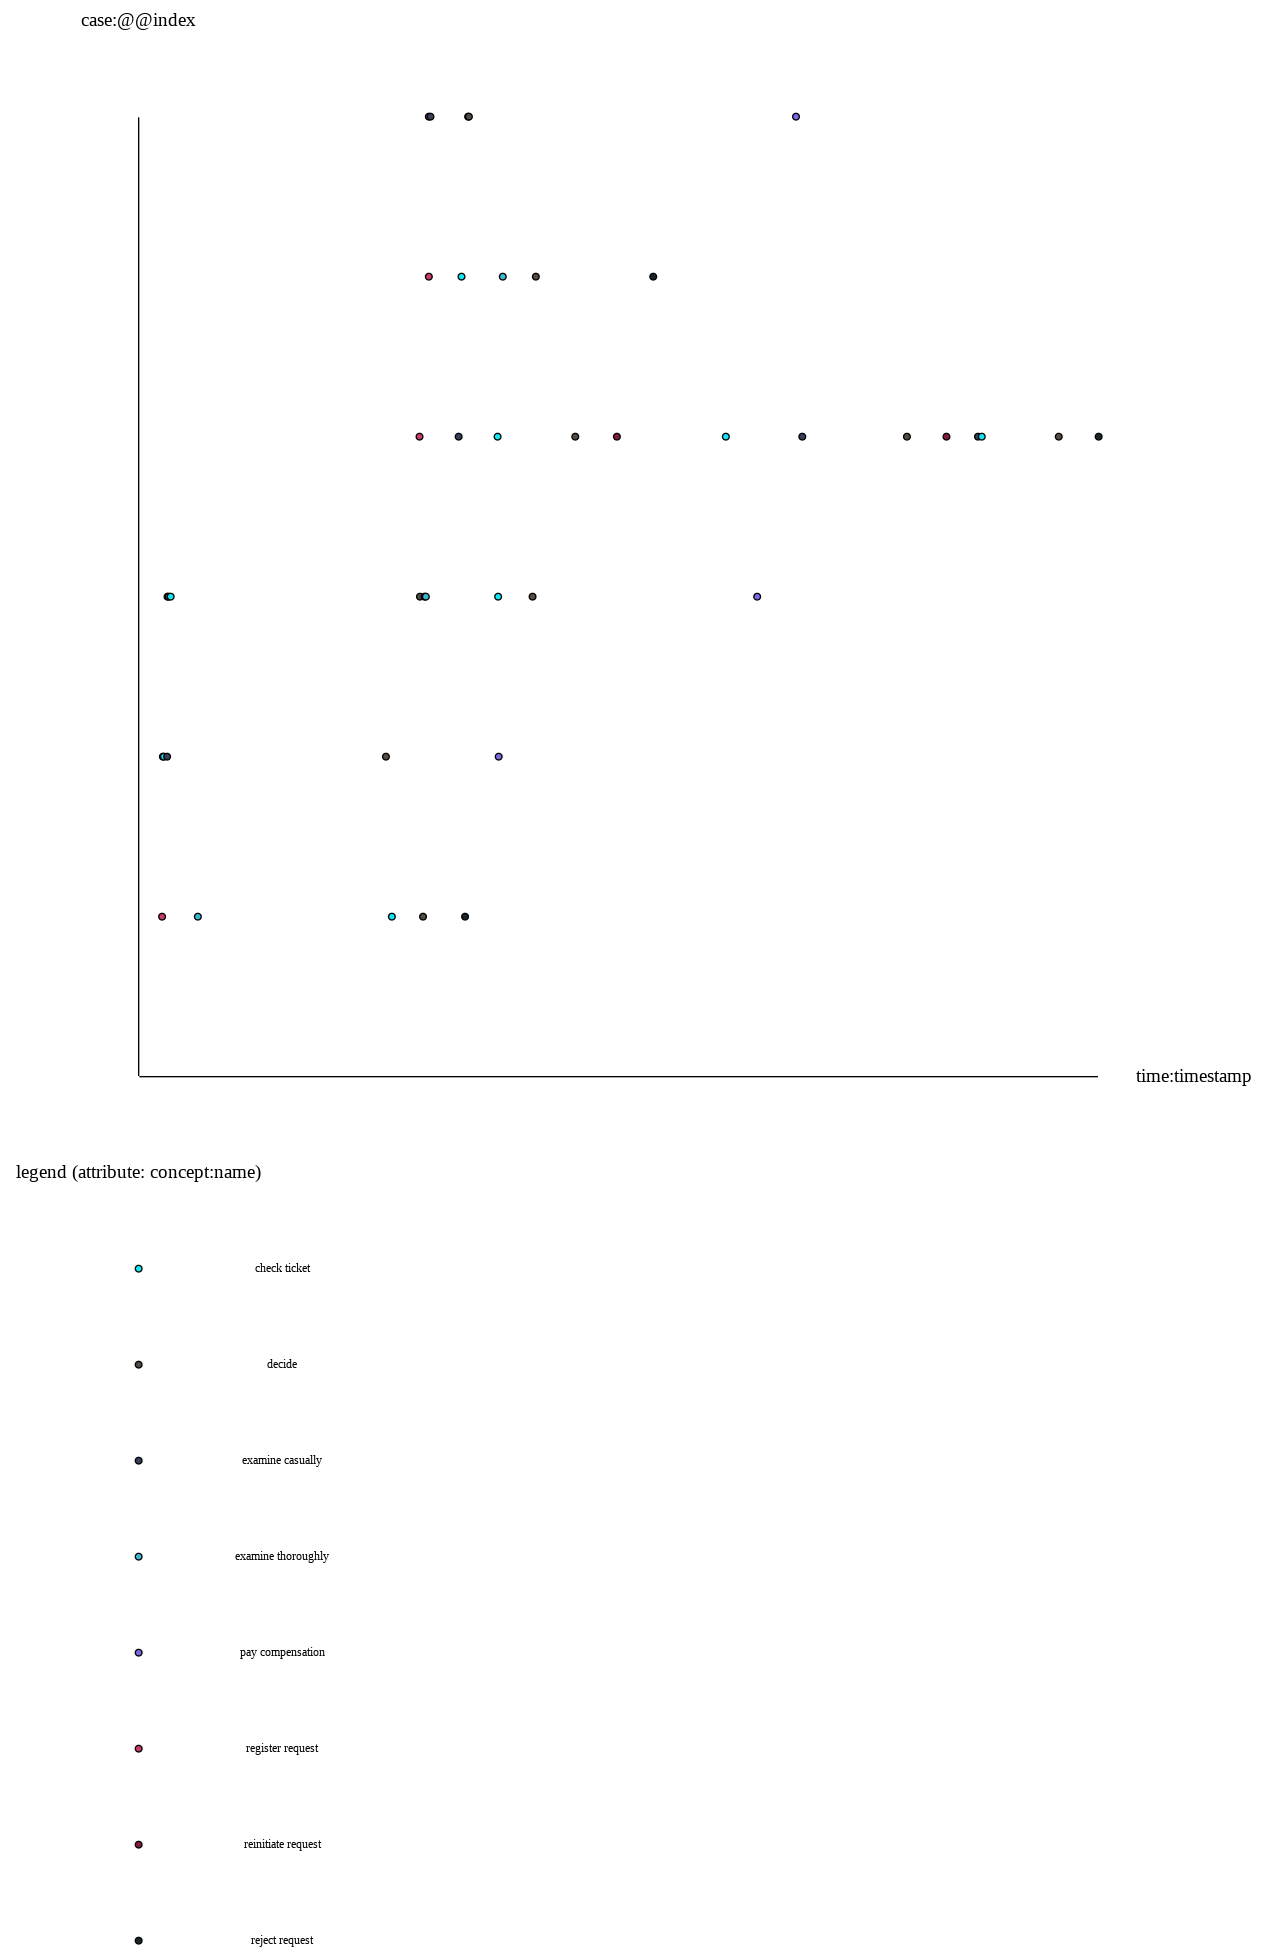

In [32]:
# dotted chart
pm4py.view_dotted_chart(event_log_pm4py)

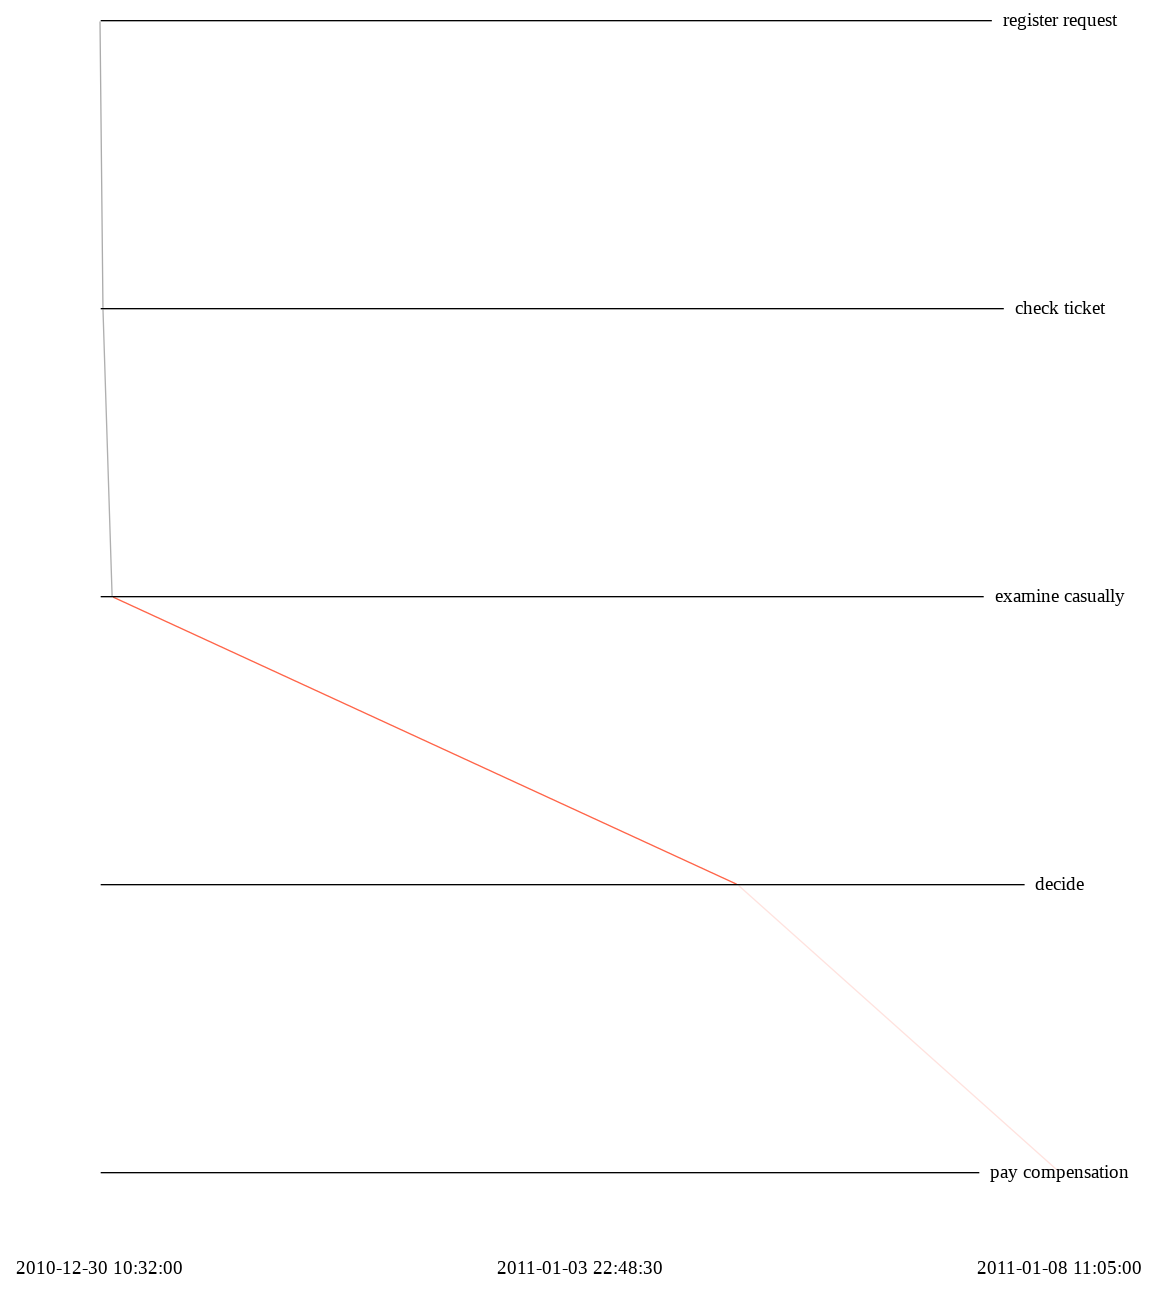

In [33]:
# performance spectrum(['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation'])
pm4py.view_performance_spectrum(event_log_pm4py, ['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation'])

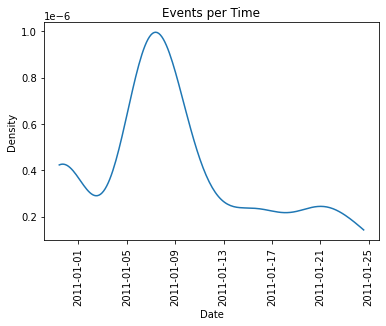

In [34]:
# Events per time
pm4py.view_events_per_time_graph(event_log_pm4py)

## Process Discovery

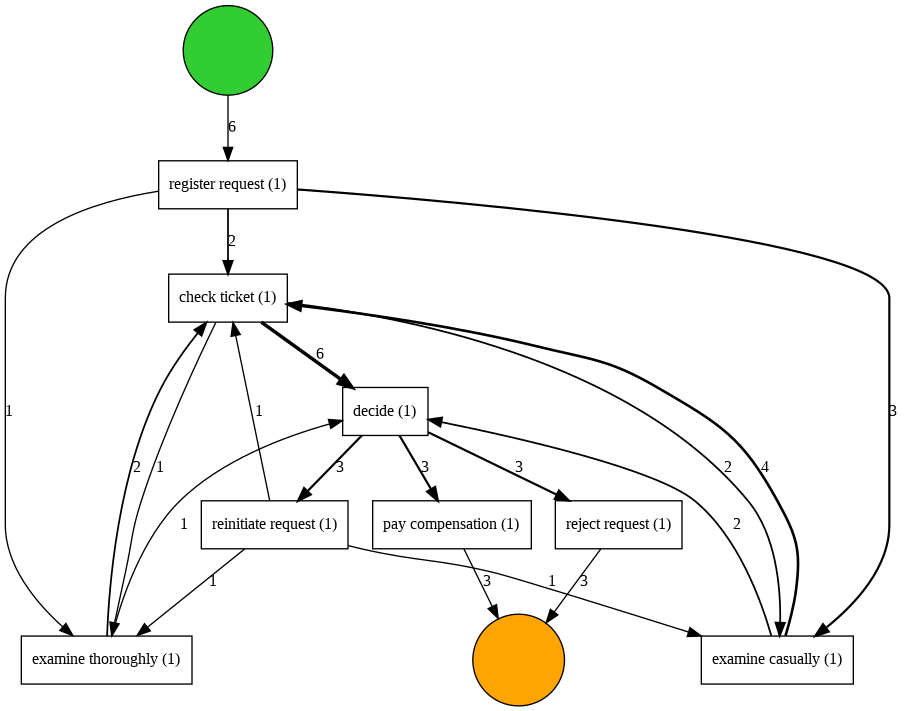

In [36]:
# DFG
rel, start, final = pm4py.discover_dfg(event_log_pm4py)
pm4py.view_dfg(rel, start, final)

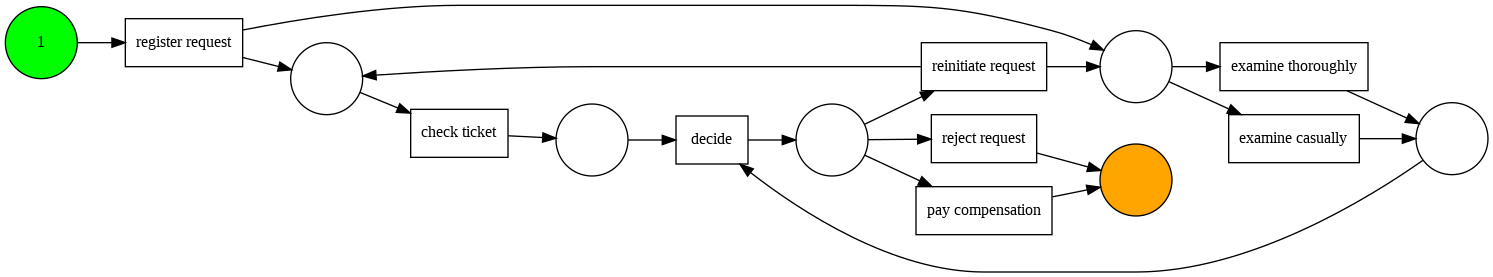

In [38]:
# Alpha mining (Petri-net)
net, im, fm = pm4py.discover_petri_net_alpha(event_log_pm4py)
pm4py.view_petri_net(net, im, fm)

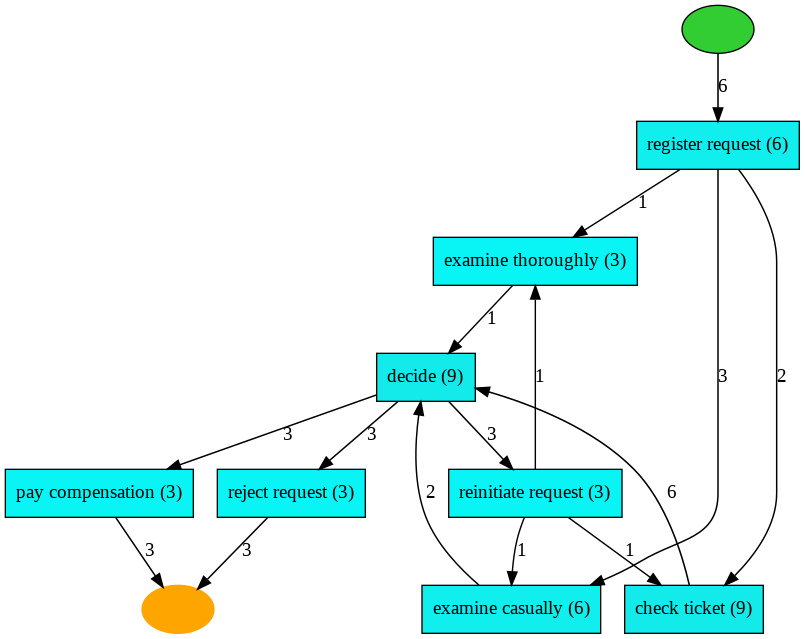

In [40]:
# Heuristic Mining (Heuristic Net)
heu_model = pm4py.discover_heuristics_net(event_log_pm4py)
pm4py.view_heuristics_net(heu_model)

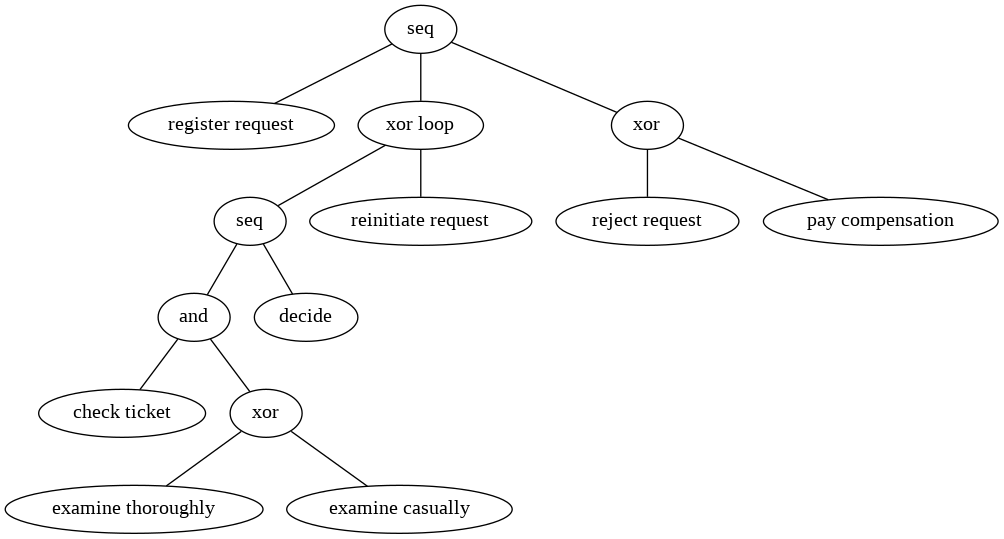

In [41]:
# Inductive Mining (Process tree)
tree = pm4py.discover_process_tree_inductive(event_log_pm4py)
pm4py.view_process_tree(tree)

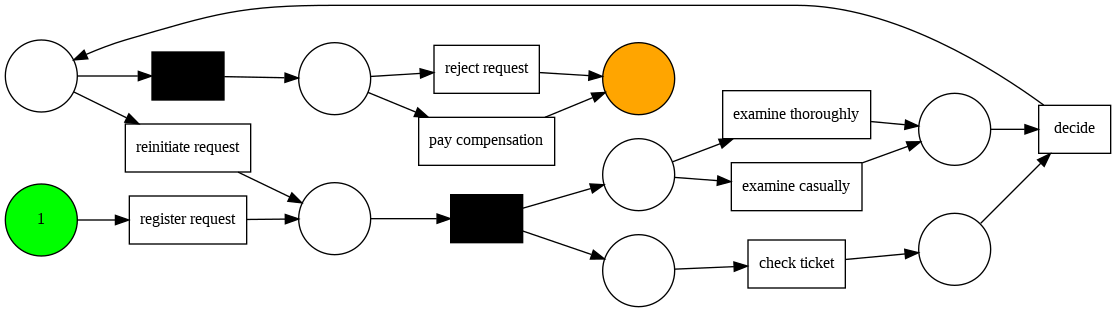

In [42]:
# Process tree to petri-net
net2, im2, fm2 = pm4py.convert_to_petri_net(tree)
pm4py.view_petri_net(net2, im2, fm2)

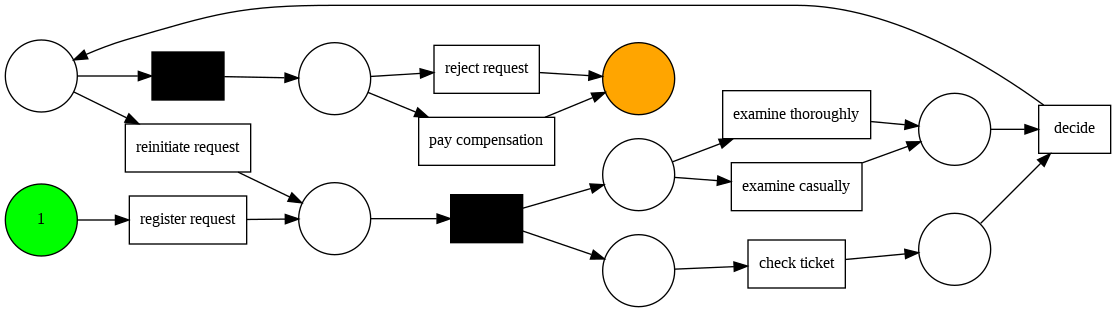

In [43]:
# Inductive mining (Petri-net)
net3, im3, fm3 = pm4py.discover_petri_net_inductive(event_log_pm4py)
pm4py.view_petri_net(net3, im3, fm3)

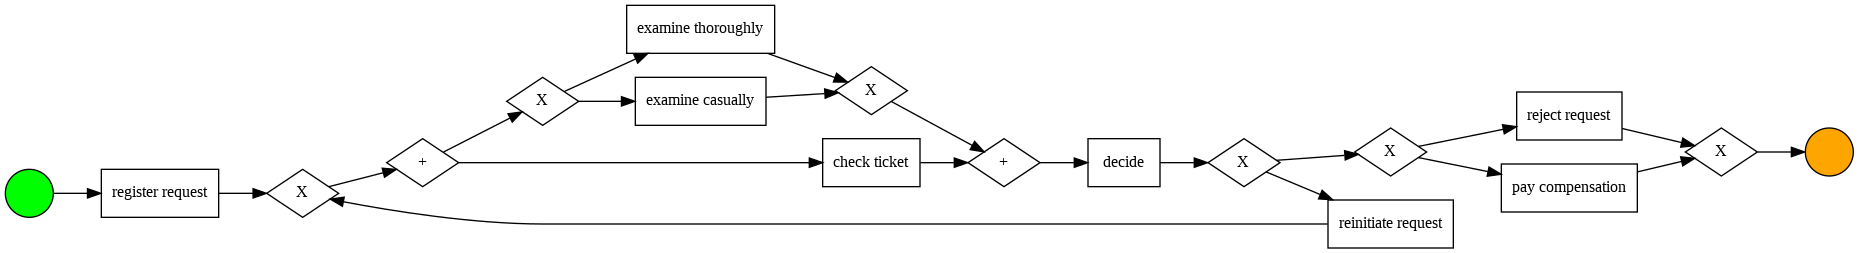

In [44]:
# Inductive mining (BPMN)
bpmn = pm4py.discover_bpmn_inductive(event_log_pm4py)
pm4py.view_bpmn(bpmn)